In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [6]:
df = pd.read_csv('../Dataset/Comments.csv')

In [7]:
df.sample(5)

,Code,Smell
345,public class DigitSummer {\r\n // Class to ...,0
241,public class ABC {\r\n // Class to demonstr...,0
309,public class AverageTemperature {\r\n // Cl...,1
157,public class Smartphone {\r\n\r\n // Brand ...,1
120,// This class calculates the average of three ...,1


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['Smell'] = encoder.fit_transform(df['Smell'])
df['Smell'].value_counts()

Smell
1    316
0    194
Name: count, dtype: int64

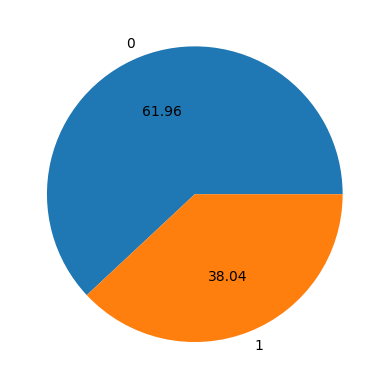

In [10]:
import matplotlib.pyplot as plt
plt.pie(df['Smell'].value_counts(), labels=['0','1'],autopct="%0.2f")
plt.show()

In [11]:
!pip install javalang
import javalang
import re

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
def count_comments_percentage(code):
    lines = code.splitlines()
    single_line_comment = re.compile(r'^\s*//')
    multi_line_comment_start = re.compile(r'^\s*/\*')
    multi_line_comment_end = re.compile(r'.*\*/')

    in_multi_line_comment = False
    loc = 0
    comment_lines = 0

    for line in lines:
        line = line.strip()

        if in_multi_line_comment:
            loc += 1
            comment_lines += 1
            if multi_line_comment_end.search(line):
                in_multi_line_comment = False
            continue

        if multi_line_comment_start.match(line):
            in_multi_line_comment = True
            loc += 1
            comment_lines += 1
            if multi_line_comment_end.search(line):
                in_multi_line_comment = False
            continue

        if single_line_comment.match(line):
            comment_lines += 1

        if line:
            loc += 1
    comment_percentage = round((comment_lines / loc) * 100) if loc > 0 else 0

    return comment_percentage


In [14]:
df['comment'] = df['Code'].apply(count_comments_percentage)

In [15]:
print(df["comment"])

0      21
1       0
2      46
3       4
4      23
       ..
505    20
506    20
507    23
508    21
509    20
Name: comment, Length: 510, dtype: int64


In [16]:
df.head(30)

,Code,Smell,comment
0,class Solution {\r\n public List<List<Integer...,1,21
1,class Solution {\r\n public boolean isHappy...,0,0
2,public class Vehicle {\r\n /* public void st...,1,46
3,import java.util.HashSet;\r\nimport java.util....,0,4
4,class Solution {\r\n public String longestC...,1,23
5,class Solution {\r\n public ListNode mergeT...,1,31
6,class Solution {\r\n public int strStr(Stri...,1,27
7,class Solution45 {\r\n public int searchIns...,1,32
8,class BinarySum{\r\n public String addBinar...,1,30
9,class SquareRoot{\r\n public int mySqrt(int...,1,31


In [20]:
X = df['comment'].values.reshape(-1, 1)
y = df['Smell'].values

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [23]:
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
y_pred1 = knc.predict(X_test)

In [24]:
print(y_pred1)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

[1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1
 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1
 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1]
0.9901960784313726
[[39  0]
 [ 1 62]]
1.0


In [25]:
code_sample = """
public class LargestElement {
    public static int findLargest(int[] array) {
        int largest = array[0];

        // Traverse the array to find the actual largest element
        for (int i = 1; i < array.length; i++) {
            if (array[i] > largest) {
                largest = array[i]; // Update largest if a larger element is found
            }
        }

        // Return the largest element found
        return largest;
    }

    public static void main(String[] args) {
        int[] numbers = {10, 20, 30, 40, 50}; // Array to search within

        // Find and print the largest element
        System.out.println("Largest element: " + findLargest(numbers));
    }
}
"""
comment_percent = count_comments_percentage(code_sample)
print(f"Comment Percentage: {comment_percent}")

Comment Percentage: 17


In [26]:
with open('../Pkl File/comments.pkl', 'wb') as model_file:
    pickle.dump(knc, model_file)